## Getting started

In this tutorial we will read HARPS spectra, extract and plot three activity indicators and radial velocity for the star HD41248.

Start by importing and initializing `ACTIN`

In [1]:
%matplotlib inline

from actin2 import ACTIN
actin = ACTIN()

Get the HARPS 1D fits files of the star HD41248 from the `test` folder

In [2]:
import glob, os
files = glob.glob(os.path.join(os.pardir, "actin2/test/HARPS/HD41248", "*_s1d_A.fits"))
files

['../actin2/test/HARPS/HD41248/HARPS.2014-01-24T01:18:06.472_s1d_A.fits',
 '../actin2/test/HARPS/HD41248/HARPS.2014-01-16T06:24:23.418_s1d_A.fits',
 '../actin2/test/HARPS/HD41248/HARPS.2014-01-24T04:17:29.213_s1d_A.fits',
 '../actin2/test/HARPS/HD41248/HARPS.2014-01-21T05:33:32.740_s1d_A.fits',
 '../actin2/test/HARPS/HD41248/HARPS.2014-01-21T03:16:16.891_s1d_A.fits',
 '../actin2/test/HARPS/HD41248/HARPS.2014-01-16T05:37:46.157_s1d_A.fits']

Check which indices come pre-installed. We start by looking at the full indices table: 

In [3]:
actin.IndTable().table

,ind_id,ind_var,ln_id,ln_c,ln_ctr,ln_win,bandtype
0,I_CaII,L1,CaIIK,1.0,3933.664,1.09,tri
1,I_CaII,L2,CaIIH,1.0,3968.470,1.09,tri
2,I_CaII,R1,CaIIR1,1.0,3901.070,20.00,sq
3,I_CaII,R2,CaIIR2,1.0,4001.070,20.00,sq
4,I_NaI,L1,NaID1,1.0,5895.920,0.50,sq
5,I_NaI,L2,NaID2,1.0,5889.950,0.50,sq
6,I_NaI,R1,NaIR1,1.0,5805.000,10.00,sq
7,I_NaI,R2,NaIR2,1.0,6097.000,20.00,sq
8,I_Ha16,L1,Ha16,1.0,6562.808,1.60,sq
9,I_Ha16,R1,HaR1,1.0,6550.870,10.75,sq


The available indices are:

In [4]:
actin.IndTable().indices

['I_CaI', 'I_CaII', 'I_Ha06', 'I_Ha16', 'I_HeI', 'I_NaI']

We are going to calculate the indices based on the CaII H&K, H$\alpha$ (using 0.6 ang central band) and NaI D2 lines using the respective index ID as in `ind_id`:

In [5]:
indices = ['I_CaII', 'I_Ha06', 'I_NaI']

Now calculate the indices for the loaded files. The results will be stored in a pandas DataFrame.

In [6]:
df = actin.run(files, indices)

100%|██████████| 6/6 [00:02<00:00,  2.94it/s]


See the results headers

In [7]:
df.keys()

Index(['obj', 'instr', 'date_obs', 'bjd', 'drs', 'exptime', 'ra', 'dec',
       'snr7', 'snr50', 'prog_id', 'pi_coi', 'cal_th_err', 'berv', 'spec_rv',
       'snr_med', 'ftype', 'rv_flg', 'rv', 'dvrms', 'ccf_noise', 'fwhm',
       'cont', 'ccf_mask', 'drift_noise', 'drift_rv', 'rv_wave_corr', 'rv_err',
       'spec_flg', 'file', 'I_CaII', 'I_CaII_err', 'I_CaII_Rneg', 'I_Ha06',
       'I_Ha06_err', 'I_Ha06_Rneg', 'I_NaI', 'I_NaI_err', 'I_NaI_Rneg',
       'actin_ver'],
      dtype='object')

and the full table

In [8]:
df

,obj,instr,date_obs,bjd,drs,exptime,ra,dec,snr7,snr50,...,I_CaII,I_CaII_err,I_CaII_Rneg,I_Ha06,I_Ha06_err,I_Ha06_Rneg,I_NaI,I_NaI_err,I_NaI_Rneg,actin_ver
0,HD41248,HARPS,2014-01-16T05:37:46.156,2.456674e+06,HARPS_3.7,600.0005,90.136003,-56.16330,12.0,55.6,...,0.126963,0.001206,0.002865,0.107759,0.000652,0.0,0.358022,0.001249,0.0,2.0 beta 8
1,HD41248,HARPS,2014-01-16T06:24:23.418,2.456674e+06,HARPS_3.7,600.0007,90.139297,-56.16415,12.4,55.6,...,0.138301,0.001236,0.001154,0.105833,0.000653,0.0,0.356299,0.001252,0.0,2.0 beta 8
2,HD41248,HARPS,2014-01-21T03:16:16.890,2.456679e+06,HARPS_3.7,900.0010,90.138288,-56.16339,26.5,101.3,...,0.145480,0.000697,0.000000,0.105242,0.000374,0.0,0.357987,0.000708,0.0,2.0 beta 8
3,HD41248,HARPS,2014-01-21T05:33:32.739,2.456679e+06,HARPS_3.7,900.0005,90.135625,-56.16338,24.6,98.0,...,0.141643,0.000732,0.000000,0.105055,0.000386,0.0,0.357836,0.000731,0.0,2.0 beta 8
4,HD41248,HARPS,2014-01-24T01:18:06.471,2.456682e+06,HARPS_3.7,600.0018,90.136782,-56.16351,15.7,67.6,...,0.139618,0.001047,0.000194,0.106154,0.000542,0.0,0.356930,0.001037,0.0,2.0 beta 8
5,HD41248,HARPS,2014-01-24T04:17:29.213,2.456682e+06,HARPS_3.7,600.0014,90.138346,-56.16322,16.4,68.2,...,0.137774,0.001003,0.000208,0.107019,0.000551,0.0,0.357135,0.001038,0.0,2.0 beta 8


and plot the results

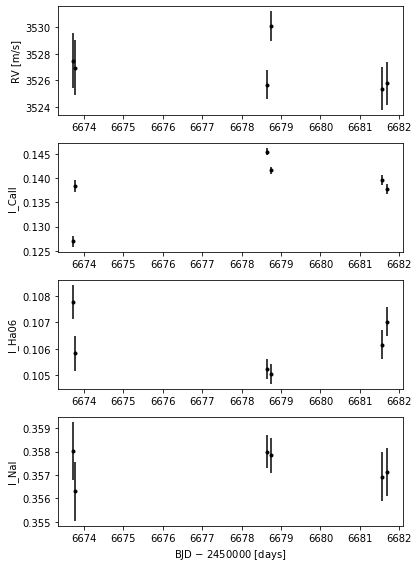

In [9]:
import matplotlib.pylab as plt

plt.figure(figsize=(6, (len(indices)+1)*2))

plt.subplot(len(indices)+1, 1, 1)
plt.ylabel("RV [m/s]")
plt.errorbar(df.bjd - 2450000, df.rv, df.rv_err, fmt='k.')

for i, index in enumerate(indices):
    plt.subplot(len(indices)+1, 1, i+2)
    plt.ylabel(index)
    plt.errorbar(df.bjd - 2450000, df[index], df[index + "_err"], fmt='k.')
plt.xlabel("BJD $-$ 2450000 [days]")
plt.tight_layout()
